In [172]:
#label 0 - positive
#label 1 - negative



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  #regular expression to rephrase any sentences
import string 
import nltk  #natural langauge tool kit mosstly used for preprocessing the data
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [173]:
#to see data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27481 non-null  int64 
 1   label   27481 non-null  int64 
 2   tweet   27480 non-null  object
dtypes: int64(2), object(1)
memory usage: 644.2+ KB


In [176]:
df=pd.read_csv('TwitterData.csv')
df.head()

,id,label,tweet
0,1,1,RT @NancyLeeGrahn: How did everyone feel about...
1,2,1,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,3,1,RT @TJMShow: No mention of Tamir Rice and the ...
3,4,1,RT @RobGeorge: That Carly Fiorina is trending ...
4,5,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [163]:
######PREPROCESSING the DATAset######

In [177]:
#to remove RT@user
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,"",input_txt)
    return input_txt

In [178]:
#remove twitter handles RT @ :
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"RT @ [:\w]*")

In [179]:
df.head()

,id,label,tweet,clean_tweet
0,1,1,RT @NancyLeeGrahn: How did everyone feel about...,RT @NancyLeeGrahn: How did everyone feel about...
1,2,1,RT @ScottWalker: Didn't catch the full #GOPdeb...,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,3,1,RT @TJMShow: No mention of Tamir Rice and the ...,RT @TJMShow: No mention of Tamir Rice and the ...
3,4,1,RT @RobGeorge: That Carly Fiorina is trending ...,RT @RobGeorge: That Carly Fiorina is trending ...
4,5,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [180]:
#removing special character, number and punctuations
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,1,RT @NancyLeeGrahn: How did everyone feel about...,RT NancyLeeGrahn How did everyone feel about...
1,2,1,RT @ScottWalker: Didn't catch the full #GOPdeb...,RT ScottWalker Didn t catch the full #GOPdeb...
2,3,1,RT @TJMShow: No mention of Tamir Rice and the ...,RT TJMShow No mention of Tamir Rice and the ...
3,4,1,RT @RobGeorge: That Carly Fiorina is trending ...,RT RobGeorge That Carly Fiorina is trending ...
4,5,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,RT DanScavino #GOPDebate w realDonaldTrump...


In [87]:
#removing short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>2]))
#if the length is greater than 3 it will keep in the string, else it will remove the characters
df.head()

,id,label,tweet,clean_tweet
0,1,1,RT @NancyLeeGrahn: How did everyone feel about...,How did everyone feel about the Climate Change...
1,2,1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Didn catch the full #GOPdebate last night Here...
2,3,1,RT @TJMShow: No mention of Tamir Rice and the ...,mention Tamir Rice and the #GOPDebate was held...
3,4,1,RT @RobGeorge: That Carly Fiorina is trending ...,That Carly Fiorina trending hours after HER de...
4,5,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,#GOPDebate realDonaldTrump delivered the highe...


In [88]:
#Tokenize tweet-splitting to individual words. These are considered as tokens
tokenized_tweet=df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [How, did, everyone, feel, about, the, Climate...
1    [Didn, catch, the, full, #GOPdebate, last, nig...
2    [mention, Tamir, Rice, and, the, #GOPDebate, w...
3    [That, Carly, Fiorina, trending, hours, after,...
4    [#GOPDebate, realDonaldTrump, delivered, the, ...
Name: clean_tweet, dtype: object

In [89]:
#stem the words- narrowing the common words to a single word. Like fighter, fighting, fought will be stemmed to fight
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [how, did, everyon, feel, about, the, climat, ...
1    [didn, catch, the, full, #gopdeb, last, night,...
2    [mention, tamir, rice, and, the, #gopdeb, wa, ...
3    [that, carli, fiorina, trend, hour, after, her...
4    [#gopdeb, realdonaldtrump, deliv, the, highest...
Name: clean_tweet, dtype: object

In [91]:
#combining all the words to single string or sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet']= tokenized_tweet
df.head()


,id,label,tweet,clean_tweet
0,1,1,RT @NancyLeeGrahn: How did everyone feel about...,how did everyon feel about the climat chang qu...
1,2,1,RT @ScottWalker: Didn't catch the full #GOPdeb...,didn catch the full #gopdeb last night here ar...
2,3,1,RT @TJMShow: No mention of Tamir Rice and the ...,mention tamir rice and the #gopdeb wa held cle...
3,4,1,RT @RobGeorge: That Carly Fiorina is trending ...,that carli fiorina trend hour after her debat ...
4,5,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,#gopdeb realdonaldtrump deliv the highest rate...


In [93]:
#######EXPLORATORY DATA ANALYSIS########
!pip install wordcloud

     |████████████████████████████████| 160 kB 3.4 MB/s eta 0:00:01


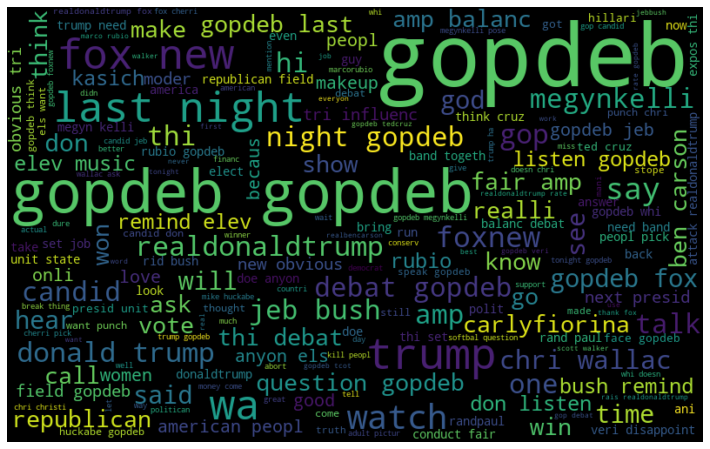

In [94]:
#visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)


#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
                                                                                
#these are the frequent words in the data. Bigger the words, more frequent they have appread in the data set.

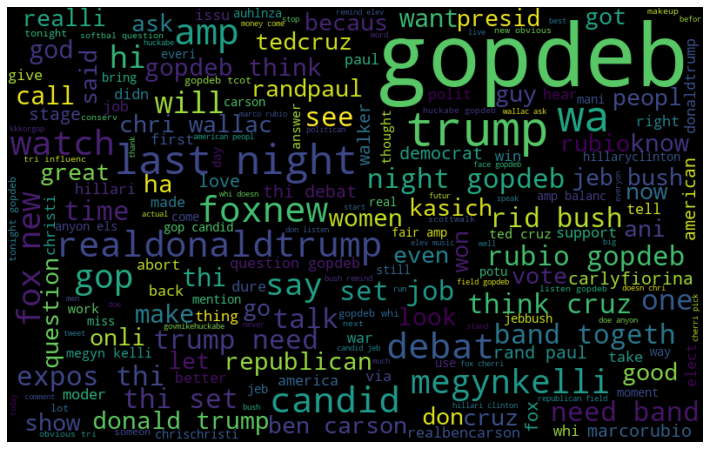

In [102]:
#Frequent words visualization for positive +ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]]);

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)


#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

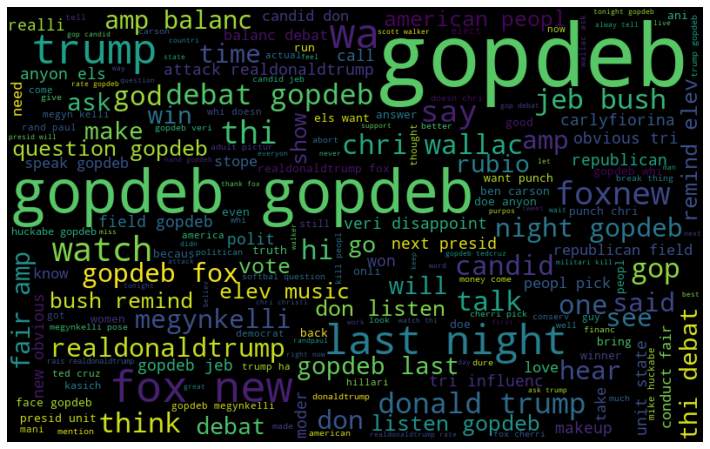

In [103]:
#Frequent words visualization for negative -ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]]);

wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)


#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [130]:
#extracting the hash tag
def hashtag_extract(tweets):
    hashtags=[]
    #Loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [131]:
#extract hashtags from positive tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extract hashtags from negative tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

ht_positive[:5]

[['gopdeb'],
 ['gopdeb', 'batsask', 'tbat'],
 ['gopdeb', 'notamistak'],
 ['donaldtrump', 'gopdeb'],
 ['gopdeb']]

In [132]:
##combing all into a single list

ht_positive=sum(ht_positive, [])
ht_negative=sum(ht_negative,[])

In [133]:
ht_positive[:5]

['gopdeb', 'gopdeb', 'batsask', 'tbat', 'gopdeb']

In [134]:
#using a dictionary from nltk to process the positive tweets
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,gopdeb,3909
1,batsask,12
2,tbat,2
3,notamistak,6
4,donaldtrump,47


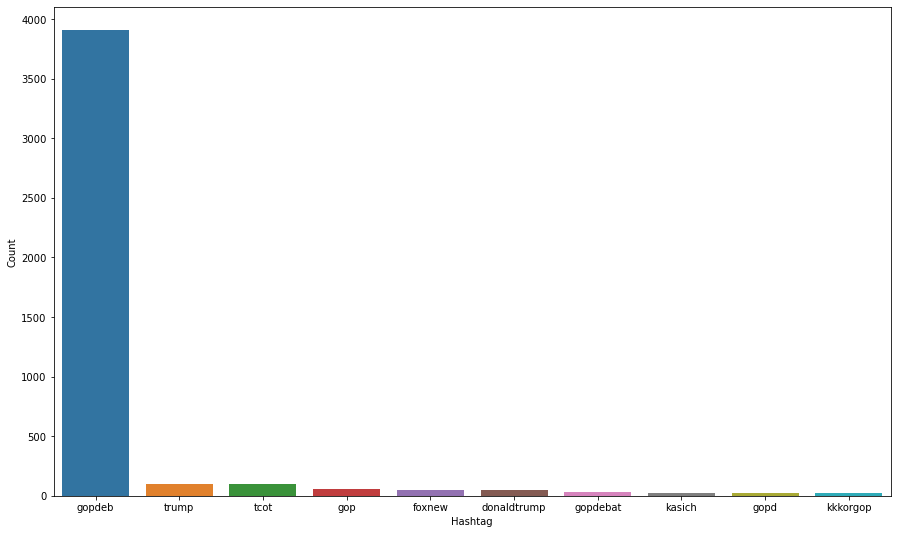

In [135]:
#using seaborn to dispplay the graph
#select top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [136]:
#using a dictionary from nltk to process the positive tweets
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,gopdeb,10520
1,walker,14
2,trump,199
3,msnbc,6
4,billclinton,1


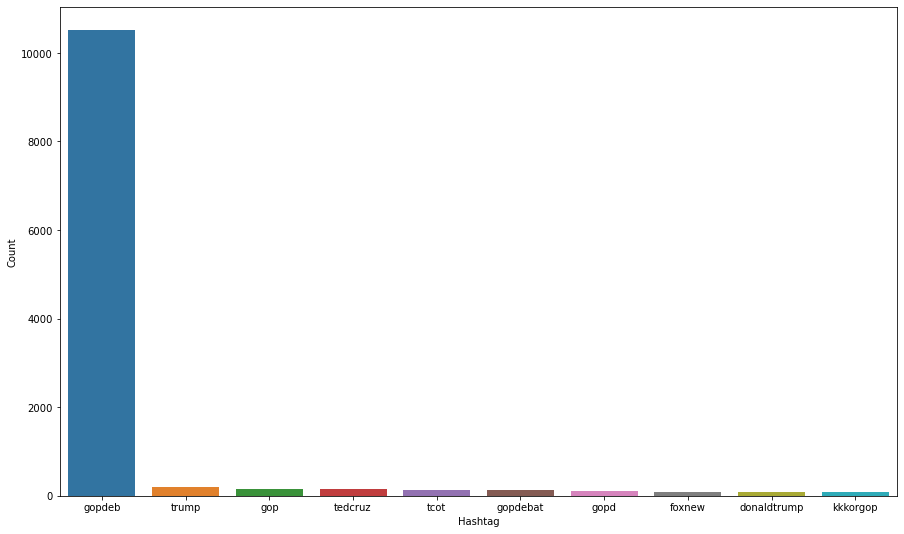

In [137]:
#using seaborn to dispplay the graph
#select top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [138]:
######Input Split#####

In [141]:
#feature extraction- to convert the words to vectors or bag of words. here we are using 
#bag of words(matrix with words and its occurences)
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])
#bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(bow,df['label'],random_state=42, test_size=0.25)

In [143]:
#####Model Training####


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [146]:
#tarining the model
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [147]:
#testing the model
pred=model.predict(x_test)
f1_score(y_test,pred)

0.8206127147157783

In [152]:
accuracy_score(y_test,pred)

0.7079008073817762

In [154]:
#use probability to prediction
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1]>=0.3
#if prob gt 30, we will chose it as 1 or else 0
pred=pred.astype(np.int)

f1_score(y_test,pred)

0.8347234042553191

In [155]:
accuracy_score(y_test,pred)

0.7200115340253749

In [158]:
pred_prob[0]


array([0.18536883, 0.81463117])

In [159]:
pred_prob[0][1]>=0.3

True